In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import sys
import os

# Add the parent directory to the system path
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '../../'))
sys.path.append(parent_directory)

from plotting import plot_velocity_expression_gp, plot_phase_plane_gp, plot_activation_or_velocity_two_gene_programs, gp_phase_plane_no_velocity


In [10]:
dataset = "forebrain"
cell_type_key = "Clusters"
model_name = "ivelo"
plot_type = ""
#gp1, gp2 = pairs_dic[dataset][3]

adata = sc.read_h5ad(f"../../benchmark/{model_name}/{dataset}/adata_gp.h5ad")
adata_genes = sc.read_h5ad(f"../../benchmark/{model_name}/{dataset}/{model_name}_{dataset}.h5ad")

In [11]:
adata.obs["pseudotime"] = adata_genes.obs["velocity_pseudotime"].copy()

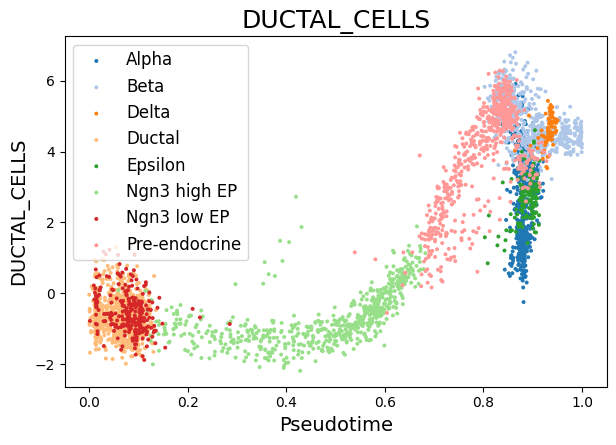

In [7]:
ax = sc.pl.scatter(adata, x="pseudotime", y="DUCTAL_CELLS", color="clusters", show=False)
ax.set_title("DUCTAL_CELLS", fontsize=18)
ax.set_xlabel("Pseudotime", fontsize=14)
ax.set_ylabel("DUCTAL_CELLS", fontsize=14)
ax.legend(fontsize=12)
plt.savefig
plt.show()

In [ ]:
pairs_pancreas = [
    ("LUMINAL_EPITHELIAL_CELLS", "DUCTAL_CELLS"),
    ("METABOLISM_OF_CARBOHYDRATES", "GLUCOSE_METABOLISM"),
    ("METABOLISM_OF_LIPIDS_AND_LIPOP", "METABOLISM_OF_CARBOHYDRATES"),
    ("DELTA_CELLS", "BETA_CELLS")
]

pairs_forebrain = [
    ("EMBRYONIC_STEM_CELLS", "NEURAL_STEM-PRECURSOR_CELLS"),
]

pairs_gastrulation_erythroid = [
    ("ERYTHROID-LIKE_AND_ERYTHROID_P", "IRON_UPTAKE_AND_TRANSPORT"),
]

pairs_dentategyrus_lamanno_P5 = [
    ("NEURONS", "OLIGODENDROCYTE_PROGENITOR_CEL"),
    ("ASTROCYTES", "OLIGODENDROCYTE_PROGENITOR_CEL"),
    ("NEURONS", "NEURONAL_SYSTEM"),
    ("NEURONAL_SYSTEM", "PYRAMIDAL_CELLS")
]

pairs_dic = {
    "forebrain" : pairs_forebrain,
    "pancreas" : pairs_pancreas,
    "gastrulation_erythroid" : pairs_gastrulation_erythroid,
    "dentategyrus_lamanno_P5" : pairs_dentategyrus_lamanno_P5
}

datasets = ["forebrain", "pancreas", "gastrulation_erythroid", "dentategyrus_lamanno_P5"]
cell_type_keys = ["Clusters", "clusters", "celltype", "clusters"]
model_names = ["ivelo", "ivelo_filtered"]

In [ ]:
for model_name in model_names:
    print(f"processing model: {model_name}")
    for dataset, cell_type_key in zip(datasets, cell_type_keys):
        os.makedirs(f"plots/gp_phase_plane_no_velo/{dataset}/{model_name}/", exist_ok=True)
        print(f"processing dataset: {dataset}")
        adata = sc.read_h5ad(f"../../benchmark/{model_name}/{dataset}/adata_gp.h5ad")
        if model_name in ["ivelo", "ivelo_filtered"]:
            adata_colors = sc.read_h5ad(f"../../benchmark/{model_name}/{dataset}/{model_name}_{dataset}.h5ad")
            adata.uns[f"{cell_type_key}_colors"] = adata_colors.uns[f"{cell_type_key}_colors"].copy()
            del adata_colors

        l = pairs_dic[dataset]

        for gp1, gp2 in l:
            print(f"gp1: {gp1}")
            print(f"gp2: {gp2}")

            flag1 = gp1 in list(adata.var_names)
            flag2 = gp2 in list(adata.var_names)
            if (not flag1) or (not flag2):
                print(f"gp1 present in dataset {dataset} model {model_name}: {flag1}")
                print(f"gp2 present in dataset {dataset} model {model_name}: {flag2}")
                print(f"skipping")
                continue

            """os.makedirs(f"plots/gp_phase_plane_no_velo/{dataset}/{model_name}/", exist_ok=True)
            gp_phase_plane_no_velocity(adata, gp1, gp2, u_scale=.1, s_scale=.1, 
                cell_type_key=cell_type_key, dataset=dataset, 
                K=11, save_path= f"plots/gp_phase_plane_no_velo/{dataset}/{model_name}/{gp1}_{gp2}.png", 
                save_plot=True, scale_expression=1)"""
            
            os.makedirs(f"plots/gp_phase_plane/{dataset}/{model_name}/", exist_ok=True)
            plot_phase_plane_gp(adata, gp1, gp2, u_scale=1, s_scale=1, 
                cell_type_key=cell_type_key, dataset=dataset, 
                K=11, save_path= f"plots/gp_phase_plane/{dataset}/{model_name}/{gp1}_{gp2}.png", 
                save_plot=True, scale_expression=1)

In [ ]:
cell_type_df = get_top_5_gps_per_cell_type_dfs(adata, cell_type_key, 20)
overall_df = get_top_5_gps_overall(adata,20)

print("\nTop 5 Gene Programs Overall:")
print(overall_df)
print("------------------")


"""print("Top 5 Gene Programs per Cell Type:")
print(cell_type_df["Radial Glia 1"])"""


In [ ]:
gp1 = "PEPTIDE_CHAIN_ELONGATION"
gp2 = "NEP_NS2_INTERACTS_WITH_THE_CEL"

In [ ]:
plot_phase_plane_gp(adata, gp1, gp2, u_scale=.1, s_scale=.1, 
                cell_type_key=cell_type_key, dataset=dataset, 
                K=11, save_path= f"plots/gp_phase_plane/{dataset}/{model_name}/{gp1}_{gp2}.png", 
                save_plot=False, scale_expression=1)

In [ ]:
dataset = "gastrulation_erythroid"
cell_type_key = "celltype"
model_name = "imVelo"
plot_type = ""
#gp1, gp2 = pairs_dic[dataset][3]


adata = sc.read_h5ad(f"../../benchmark/{model_name}/{dataset}/adata_gp.h5ad")

In [ ]:
adata

In [ ]:
adata.uns["linear_weights"].shape

In [ ]:
sc.pl.scatter(adata, x="isomap_1", y="GLUCAGON_SIGNALING_IN_METABOLI", layers="X", color="clusters",
              title="GLUCAGON_SIGNALING_IN_METABOLI")

In [ ]:
gp1, gp2 = "G_ALPHA_I_SIGNALLING_EVENTS", "GLUCAGON_SIGNALING_IN_METABOLI"

In [8]:
gp1 = "DUCTAL_CELLS"

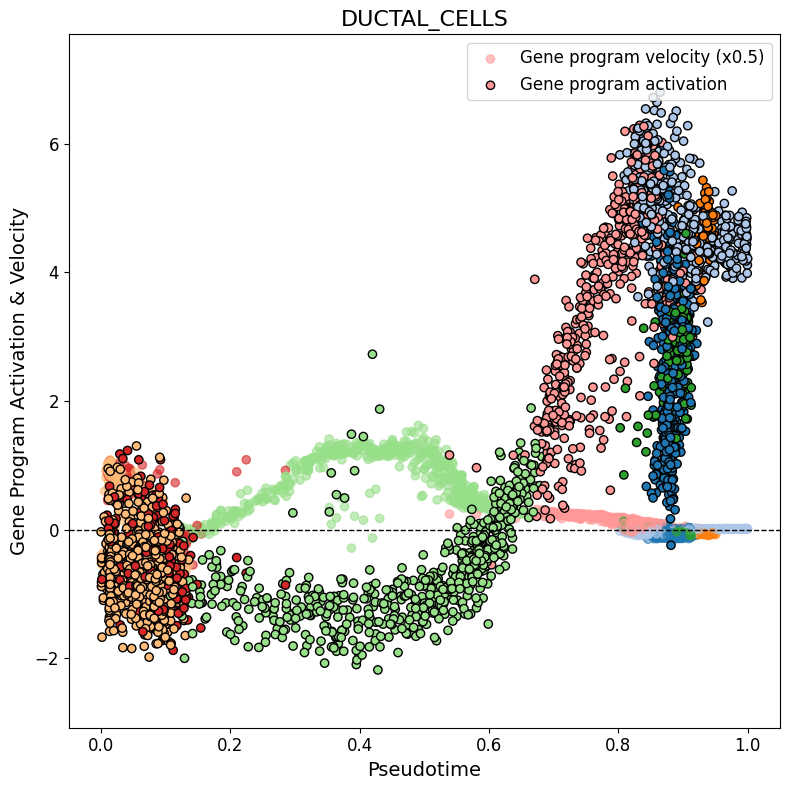

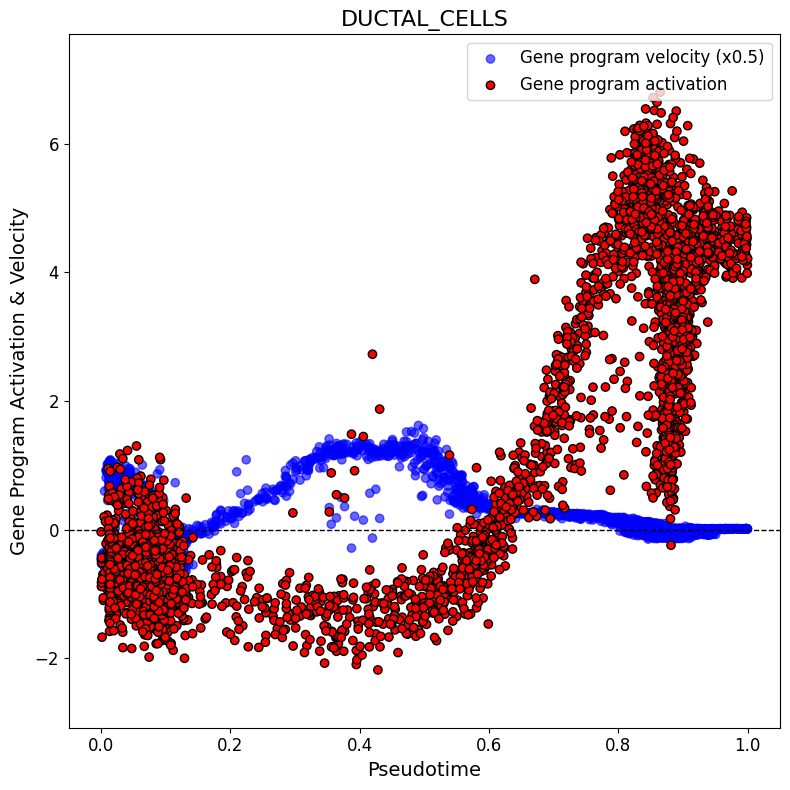

In [21]:
os.makedirs(f"plots/velo_activation/{dataset}/{model_name}/", exist_ok=True)
if model_name in ["ivelo", "ivelo_filtered"]:
    adata_colors = sc.read_h5ad(f"../../benchmark/{model_name}/{dataset}/{model_name}_{dataset}.h5ad")
    adata.uns[f"{cell_type_key}_colors"] = adata_colors.uns[f"{cell_type_key}_colors"].copy()
    del adata_colors

gp_used = gp1
for use_cell_type_colors in [True, False]:
    plot_velocity_expression_gp(adata, 
                            scale_velocity=.5, 
                            shift_expression=0, 
                            gene_name=gp_used, 
                            plot_type=plot_type,  
                            use_cell_type_colors=use_cell_type_colors, 
                            cell_type_key=cell_type_key,  
                            save_path=f"plots/velo_activation/{dataset}/{model_name}/{gp_used}_colors_{use_cell_type_colors}.png", 
                            save_plot=False, 
                            plot_shift=True, 
                            reverse_pseudotime=False,
                            vertical_lines=None,
                            pseudotime_key="pseudotime")

In [ ]:
os.makedirs(f"plots/two_gp_vs_time/{dataset}/{model_name}/", exist_ok=True)

plot_type = "velocity"
for use_cell_type_colors in [True, False]:
    plot_activation_or_velocity_two_gene_programs(adata,
                            gene_name1=gp1,
                            gene_name2=gp2,
                            plot_type=plot_type,
                            use_cell_type_colors=use_cell_type_colors,
                            scale_expr1=1, 
                            shift_expr1=0, 
                            scale_expr2=1, 
                            shift_expr2=0,
                            #legend_loc="upper right",
                            cell_type_key=cell_type_key, 
                            save_path=f"plots/two_gp_vs_time/{dataset}/{model_name}/{gp1}_{gp2}_{plot_type}_colors_{use_cell_type_colors}.png", 
                            save_plot=True,
                            reverse_pseudotime=False)

In [ ]:
def print_top_N_gps_per_cell_type(adata, N):
    # Get the cell type labels
    cell_types = adata.obs[cell_type_key]

    # Get gene program names from adata.uns["terms"]
    gene_program_names = np.array(adata.uns["terms"])

    # For each cell type, compute the mean activation of each gene program
    unique_cell_types = cell_types.unique()

    for cell_type in unique_cell_types:
        # Subset data for the current cell type
        cell_type_mask = (cell_types == cell_type)
        z_cell_type = adata.X[cell_type_mask, :]
        
        # Calculate the mean activation across cells for each gene program
        mean_activation = np.mean(z_cell_type, axis=0)
        
        # Find top 5 most activated (positive) and inactivated (negative) gene programs
        top_5_activated_idx = np.argsort(mean_activation)[-N:][::-1]  # Top 5 positive
        top_5_inactivated_idx = np.argsort(mean_activation)[:N]  # Top 5 negative
        
        # Print results for this cell type
        print(f"Top 5 positively activated gene programs for cell type: {cell_type} in dataset: {dataset}")
        for idx in top_5_activated_idx:
            print(f"{gene_program_names[idx]}: {mean_activation[idx]}")
        
        print(f"Top 5 negatively activated for cell type: {cell_type} in dataset: {dataset}")
        for idx in top_5_inactivated_idx:
            print(f"{gene_program_names[idx]}: {mean_activation[idx]}")
        
        print("-" * 50)
print_top_N_gps_per_cell_type(adata, 10)

In [ ]:
def print_top_N_gps_overall(adata, N):
    # Get gene program names from adata.uns["terms"]
    gene_program_names = np.array(adata.uns["terms"])
    
    # Calculate the mean activation across all cells for each gene program
    mean_activation = np.mean(adata.X, axis=0)
    
    # Find top N most activated (positive) and inactivated (negative) gene programs
    top_N_activated_idx = np.argsort(mean_activation)[-N:][::-1]  # Top N positive
    top_N_inactivated_idx = np.argsort(mean_activation)[:N]  # Top N negative
    
    # Print top N activated gene programs
    print(f"Top {N} positively activated gene programs in the entire dataset:")
    for idx in top_N_activated_idx:
        print(f"{gene_program_names[idx]}: {mean_activation[idx]}")
    
    # Print top N inactivated gene programs
    print(f"Top {N} negatively activated gene programs in the entire dataset:")
    for idx in top_N_inactivated_idx:
        print(f"{gene_program_names[idx]}: {mean_activation[idx]}")
    
    print("-" * 50)

print_top_N_gps_overall(adata, 10)

In [23]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd

def get_top_5_gps_per_cell_type_dfs(adata, layer="Activation", cell_type_key="cell_type", N=5):
    # Get the cell type labels
    cell_types = adata.obs[cell_type_key]

    # Get gene program names from adata.uns["terms"]
    gene_program_names = np.array(adata.uns["terms"])

    # For each cell type, compute the mean activation of each gene program
    unique_cell_types = cell_types.unique()
    dfs = {}

    for cell_type in unique_cell_types:
        # Subset data for the current cell type
        cell_type_mask = (cell_types == cell_type)
        if layer == "Activation":
            z_cell_type = adata.X[cell_type_mask, :]
        elif layer == "GP Velocity":
            z_cell_type = adata.X[cell_type_mask, :]

        
        # Calculate the mean activation across cells for each gene program
        mean_activation = np.mean(z_cell_type, axis=0)
        
        # Rank gene programs by absolute mean activation
        top_5_idx = np.argsort(np.abs(mean_activation))[-N:][::-1]
        
        # Create a DataFrame for this cell type
        df = pd.DataFrame({
            "Gene Program": [gene_program_names[idx] for idx in top_5_idx],
            f"Mean {layer}": mean_activation[top_5_idx]
        })
        
        # Store DataFrame in dictionary with cell type as key
        dfs[cell_type] = df

    return dfs


def get_top_5_gps_overall(adata, layer="Activation", N=5):
    # Get gene program names from adata.uns["terms"]
    gene_program_names = np.array(adata.uns["terms"])
    
    # Calculate the mean activation across all cells for each gene program
    if layer=="Activation":
        data = adata.X  
    elif layer == "GP Velocity":
        data = adata.layers["velocity"]

    mean_activation = np.mean(data, axis=0)

    
    # Rank gene programs by absolute mean activation
    top_5_idx = np.argsort(np.abs(mean_activation))[-N:][::-1]
    
    # Create DataFrame for top 5 gene programs in the entire dataset
    df = pd.DataFrame({
        "Gene Program": [gene_program_names[idx] for idx in top_5_idx],
        f"Mean {layer}": mean_activation[top_5_idx]
    })
    
    return df


In [33]:
get_top_5_gps_per_cell_type_dfs(adata, layer="GP Velocity", cell_type_key="clusters", N=5)

{'Pre-endocrine':                      Gene Program  Mean GP Velocity
 0           ENTEROENDOCRINE_CELLS         24.050475
 1  ERYTHROID-LIKE_AND_ERYTHROID_P        -13.998121
 2                     ALPHA_CELLS         12.308462
 3          METABOLISM_OF_PROTEINS        -11.415401
 4                   IMMUNE_SYSTEM         11.367763,
 'Ductal':                      Gene Program  Mean GP Velocity
 0                     OSTEOCLASTS        -14.245554
 1        LUMINAL_EPITHELIAL_CELLS         11.412285
 2          METABOLISM_OF_PROTEINS        -10.841408
 3                     OSTEOBLASTS         10.480696
 4  NONSENSE_MEDIATED_DECAY_ENHANC        -10.368454,
 'Alpha':                      Gene Program  Mean GP Velocity
 0  GLUCAGON_SIGNALING_IN_METABOLI         27.339625
 1       GPCR_DOWNSTREAM_SIGNALING         21.226924
 2  PEPTIDE_LIGAND_BINDING_RECEPTO        -19.020934
 3  CLASS_A1_RHODOPSIN_LIKE_RECEPT        -18.708128
 4     G_ALPHA_I_SIGNALLING_EVENTS         17.020064,
 'Ngn3 

In [26]:
get_top_5_gps_overall(adata, layer="GP Velocity", N=10)

,Gene Program,Mean GP Velocity
0,BETA_CELLS,-18.766554
1,REGULATION_OF_GENE_EXPRESSION_,13.656230
2,ALPHA_CELLS,-11.106989
3,DIABETES_PATHWAYS,-10.791473
4,GASTRIN_CREB_SIGNALLING_PATHWA,-10.667096
5,CLASS_B_2_SECRETIN_FAMILY_RECE,-10.354553
6,G_ALPHA_S_SIGNALLING_EVENTS,9.036350
7,REGULATION_OF_INSULIN_SECRETIO,7.694038
8,GLUCAGON_SIGNALING_IN_METABOLI,7.626560
9,G_ALPHA_Q_SIGNALLING_EVENTS,-7.163313


In [ ]:
dataset = "gastrulation_erythroid"
cell_type_key = "celltype"
model_name = "imVelo"
plot_type = ""
#gp1, gp2 = pairs_dic[dataset][3]

adata = sc.read_h5ad(f"../../benchmark/{model_name}/{dataset}/adata_gp.h5ad")

In [ ]:
adata